In [4]:
!pip install cufflinks
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import cufflinks as cf
import plotly
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
cf.go_offline()


  DEPRECATION: cufflinks is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ------------------------------ --------- 61.4/81.7 kB 1.7 MB/s eta 0:00:01
     ----------------------------------- ---- 71.7/81.7 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 81.7/81.7 kB 760.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.3 MB 1.9 MB/s eta 0:00:08
     ---------------------------------------- 0.1/15.3 MB 1.3 MB/s eta 0:00:12
     ---------------------------------------- 0.1/15.3 MB 1.2 MB/s eta 0:00:13
      --------------------------------------- 0.2/15.3 MB 1.2 MB/s eta 0:00:13
      --------------------------------------- 0.3/15.3 MB 1.2 MB/s eta 0:00:13
      --------------------------------------- 0.3/15.3 MB 1.3 MB/s eta 0:00:12
      ----------------------------------

In [13]:
df = pd.read_csv('cancer.csv')


In [14]:
df.head()

,Patient Id,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,High
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient Id             1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   int64 
 3   AirPollution           1000 non-null   int64 
 4   Alcoholuse             1000 non-null   int64 
 5   DustAllergy            1000 non-null   int64 
 6   OccuPationalHazards    1000 non-null   int64 
 7   GeneticRisk            1000 non-null   int64 
 8   chronicLungDisease     1000 non-null   int64 
 9   BalancedDiet           1000 non-null   int64 
 10  Obesity                1000 non-null   int64 
 11  Smoking                1000 non-null   int64 
 12  PassiveSmoker          1000 non-null   int64 
 13  ChestPain              1000 non-null   int64 
 14  CoughingofBlood        1000 non-null   int64 
 15  Fatigue               

In [16]:
df.drop(columns=['Patient Id'],axis = 1,inplace=True)


In [10]:
df.head()

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,High
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [17]:
df['Level']

0       Low
1      High
2      High
3      High
4      High
       ... 
995    High
996    High
997    High
998    High
999    High
Name: Level, Length: 1000, dtype: object

In [18]:
df['Level'].replace('Medium','High',inplace=True)

In [19]:
df['Level'].replace('High','1',inplace=True)
df['Level'].replace('Low','0',inplace=True)

In [20]:
df.head()

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,1
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,1
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,1


In [21]:
df['Level'] = pd.to_numeric(df['Level'])

In [22]:
df.isnull()

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isnull().any()

Age                      False
Gender                   False
AirPollution             False
Alcoholuse               False
DustAllergy              False
OccuPationalHazards      False
GeneticRisk              False
chronicLungDisease       False
BalancedDiet             False
Obesity                  False
Smoking                  False
PassiveSmoker            False
ChestPain                False
CoughingofBlood          False
Fatigue                  False
WeightLoss               False
ShortnessofBreath        False
Wheezing                 False
SwallowingDifficulty     False
ClubbingofFingerNails    False
FrequentCold             False
DryCough                 False
Snoring                  False
Level                    False
dtype: bool

In [24]:
df.isnull().sum()

Age                      0
Gender                   0
AirPollution             0
Alcoholuse               0
DustAllergy              0
OccuPationalHazards      0
GeneticRisk              0
chronicLungDisease       0
BalancedDiet             0
Obesity                  0
Smoking                  0
PassiveSmoker            0
ChestPain                0
CoughingofBlood          0
Fatigue                  0
WeightLoss               0
ShortnessofBreath        0
Wheezing                 0
SwallowingDifficulty     0
ClubbingofFingerNails    0
FrequentCold             0
DryCough                 0
Snoring                  0
Level                    0
dtype: int64

<Axes: >

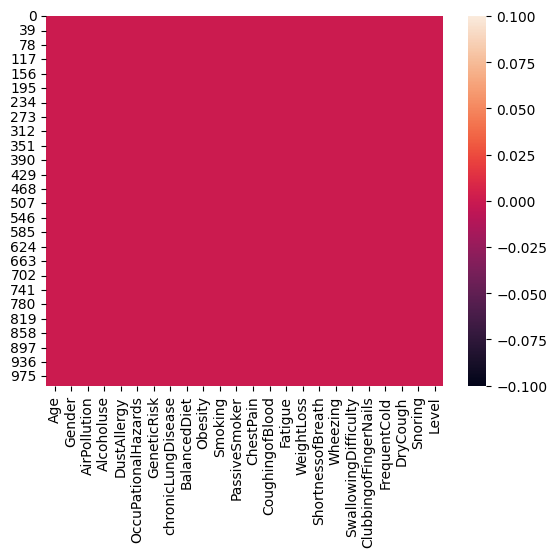

In [25]:
import seaborn as sns
sns.heatmap(df.isnull())

<Axes: xlabel='Smoking', ylabel='count'>

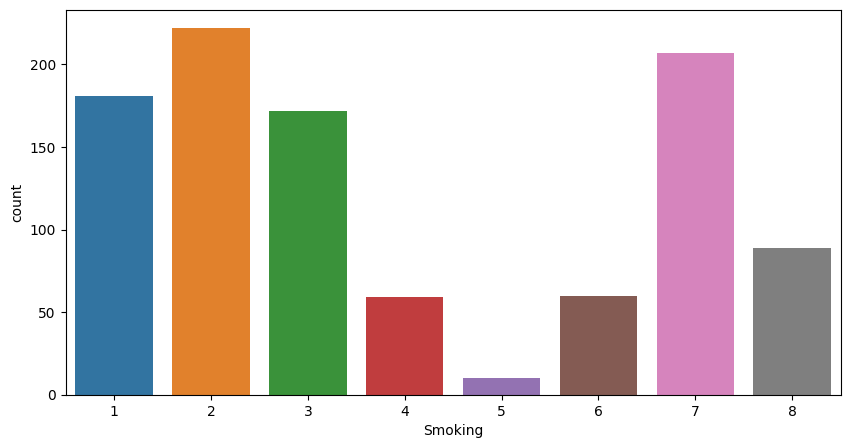

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='Smoking',data=df)

<Axes: xlabel='ChestPain', ylabel='count'>

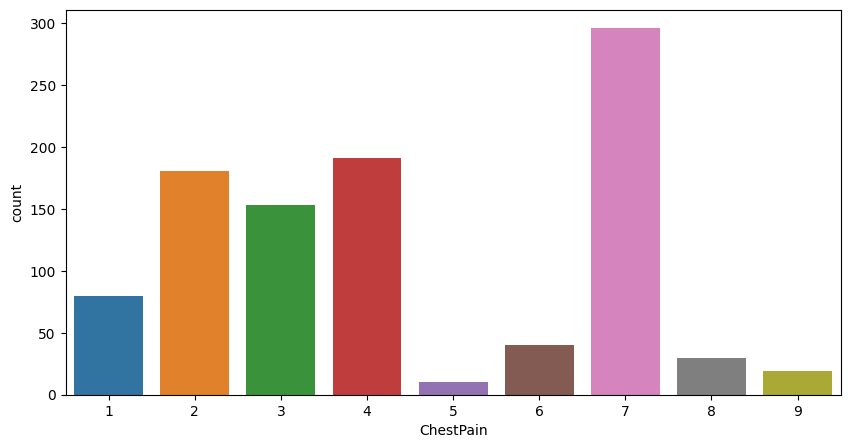

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='ChestPain',data = df)

<Axes: xlabel='ChestPain', ylabel='Age'>

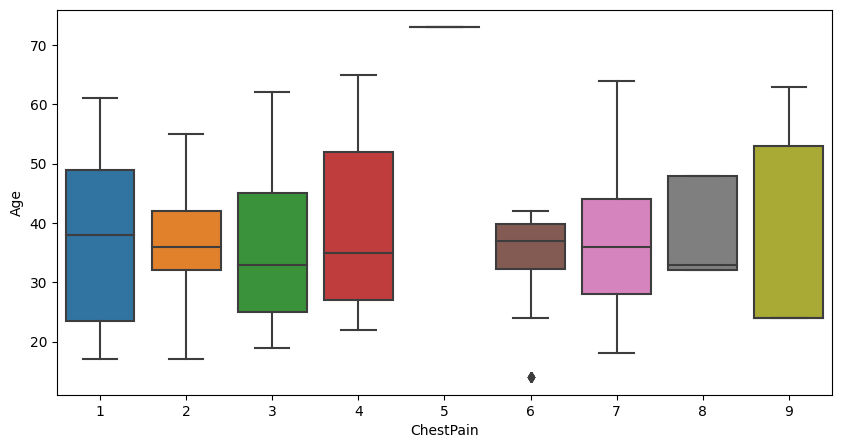

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x='ChestPain',y='Age',data = df)

<Axes: xlabel='Smoking', ylabel='Age'>

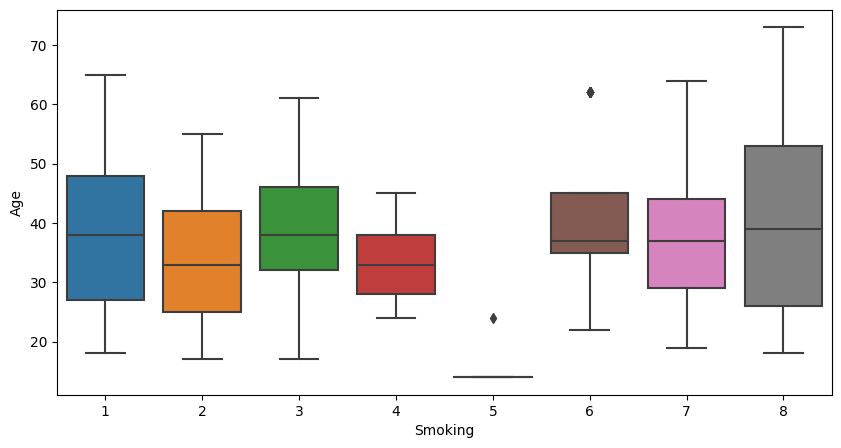

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Smoking',y='Age',data = df)

In [30]:
sorted_smokers = df.groupby('Age')['Smoking'].count().to_frame()

In [31]:
sorted_smokers.style.background_gradient(cmap = 'Reds')

,Smoking
Age,
14,9
17,20
18,18
19,20
22,19
23,19
24,30
25,30
26,37


In [32]:
df.style.background_gradient(cmap = 'Reds')

In [33]:
import plotly.graph_objects as go

In [34]:
fig = go.Figure()
fig.add_trace(go.Bar(x=label,y=target))
fig.update_layout(title = 'Smokers per age',xaxis=dict(title='Age'),yaxis=dict(title='Smokers'))
fig.show()

NameError: name 'label' is not defined

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=label,y=target,mode='markers+lines'))
fig.update_layout(title = 'Smokers per age',xaxis=dict(title='Age'),yaxis=dict(title='Smokers'))
fig.show()

ml
randomforest

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import log_loss, f1_score
from sklearn.model_selection import cross_val_score
import numpy as np 
acc_dict = {}
# create the data
X = df.drop('Level',axis = 1)
y = df['Level']
X_train, X_test, y_train, y_test = train_test_split(X,y)

Accuracy score :  100.0


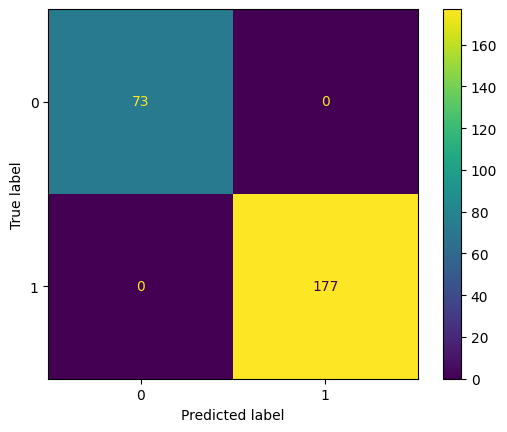

In [53]:
from sklearn.ensemble import  RandomForestClassifier
# create model
model = RandomForestClassifier()

# fit the data in the model
model.fit(X_train,y_train)

y_pred_randomF = model.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test, y_pred_randomF)*100)

# acc_dict['RFC_log_loss'] = log_loss(y_test, y_pred_randomF)
# acc_dict['RFC_F!1_Score'] = f1_score(y_test, y_pred_randomF,average='weighted')
# # prediction visualization
# plt.imshow(np.log(confusion_matrix(y_test,y_pred_randomF)),cmap = 'Blues',interpolation = 'nearest')
# plt.ylabel('True')
# plt.xlabel('Predicted')
# plt.show()
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_randomF))
disp.plot()
plt.show()

# knn

Best k is 3 with score 0.9986666666666666
Accuracy score :  99.6


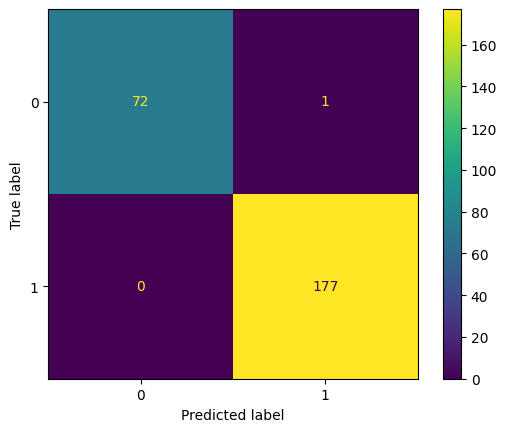

In [54]:
from sklearn.neighbors import KNeighborsClassifier
# to find the best k 
score = 0
scores, highscore, bestk = 0, 0, 0

for k in range(3,12):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train)
    score = scores.mean()
    if score>highscore:
        highscore = score
        bestk = k
print('Best k is {} with score {}'.format(bestk, highscore))

knn = KNeighborsClassifier(n_neighbors=bestk)
knn.fit(X_train,y_train)
# prediction 
y_predict = knn.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test,y_predict)*100)
acc_dict['KNN_log_loss'] = log_loss(y_test, y_predict)
acc_dict['KNN_F!1_Score'] = f1_score(y_test, y_predict,average='weighted')

# # prediction visualization
# plt.xlaimshow(np.log(confusion_matrix(y_test,y_predict)),cmap = 'Blues',interpolation = 'nearest')
# plt.ylabel('True')
# plt.bel('Predicted')
# plt.show()
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict))
disp.plot()
plt.show()

# kmenas

C:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Accuracy score :  12.0


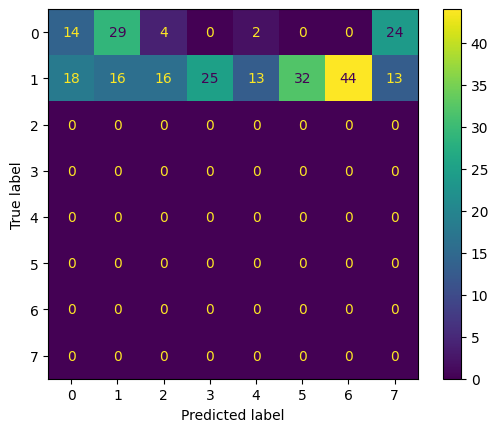

In [55]:
from sklearn.cluster import KMeans
clf = KMeans()
clf.fit(X_train)
maxx = clf.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test,maxx)*100)
acc_dict['kMeans_log_loss'] = log_loss(y_test, maxx)
acc_dict['kMeans_F1_Score'] = f1_score(y_test, maxx,average='weighted')

# plt.imshow(np.log(confusion_matrix(y_test,maxx)),cmap='Reds', interpolation = 'nearest')
# plt.ylabel('True')
# plt.xlabel('Predicted')

from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,maxx))
disp.plot()
plt.show()

# tree

Accuracy score :  100.0


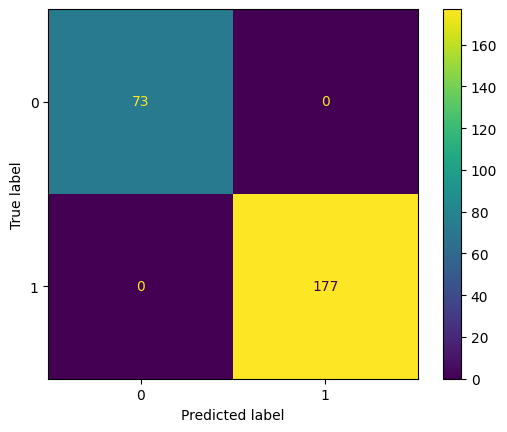

In [56]:
from sklearn.tree import DecisionTreeClassifier
tree_ = DecisionTreeClassifier()
tree_.fit(X_train,y_train)
y_pred = tree_.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
acc_dict['Tree_log_loss'] = log_loss(y_test,y_pred)
acc_dict['Tree_f!1_score'] = f1_score(y_test,y_pred)

# # prediction visualization
# plt.imshow(np.log(confusion_matrix(y_test,y_pred)),cmap = 'Blues',interpolation = 'nearest')
# plt.ylabel('True')
# plt.xlabel('Predicted')
# plt.show()
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()

# svm

Accuracy score :  98.8


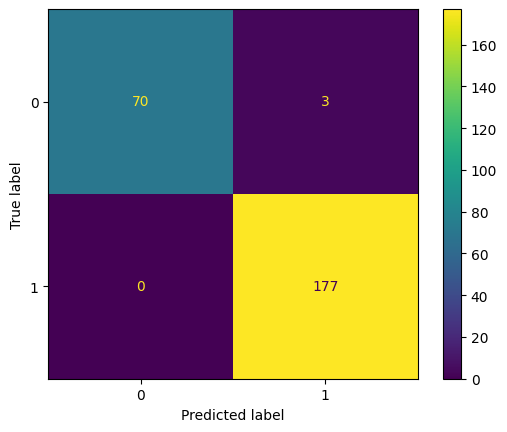

In [57]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
acc_dict['svc_log_loss'] = log_loss(y_test,y_pred)
acc_dict['svc_f!1_score'] = f1_score(y_test,y_pred)
# prediction visualization
# plt.imshow(np.log(confusion_matrix(y_test,y_pred)),cmap = 'Blues',interpolation = 'nearest')
# plt.ylabel('True')
# plt.xlabel('Predicted')
# plt.show()
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()